# Pymaceuticals Inc.
---

### Analysis

- Pymaceuticals, Inc. conducted a study to compare the performance of their drug of interest, Capomulin, against other treatments for squamous cell carcinoma (SCC) in mice. The study involved 249 mice with SCC tumors that received various drug regimens, including Capomulin, Ramicane, Infubinol, and Ceftamin.

- The analysis began with merging the mouse metadata and study results data frames into one, cleaning the data, and creating summary statistics for mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.

- Two bar charts and two pie charts were generated to display the total number of time points and the distribution of male versus female mice in the study, respectively.

- The analysis then focused on the four most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. The final tumor volumes for each mouse were calculated, and the quartiles and IQR were determined to identify any potential outliers. Box plots were generated to show the distribution of the final tumor volume for all mice in each treatment group, and potential outliers were highlighted.

- Lastly, a line plot was generated to show tumor volume versus time point for a mouse treated with Capomulin, and a scatter plot was generated to show the correlation between tumor volume and mouse weight for the Capomulin treatment regimen. The correlation coefficient and linear regression model were calculated and plotted on top of the scatter plot to show the relationship between mouse weight and tumor volume.

- Overall, the analysis provides valuable insights into the effectiveness of various drug regimens for SCC in mice and highlights Capomulin as a promising treatment option.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
unique_mice_count = len(merged_data["Mouse ID"].unique())
print(f"Number of unique mice: {unique_mice_count}")

Number of unique mice: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = merged_data.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
for mouse_id in duplicate_mouse_ids:
    print(f"Duplicate Mouse ID: {mouse_id}")
    display(merged_data.loc[merged_data["Mouse ID"] == mouse_id])

Duplicate Mouse ID: g989


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data[merged_data["Mouse ID"].isin(duplicate_mouse_ids)==False]
cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count_cleaned = len(cleaned_data["Mouse ID"].unique())
print(f"Number of unique mice after cleaning: {unique_mice_count_cleaned}")

Number of unique mice after cleaning: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = cleaned_data.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
})
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stats.columns = [
    "Mean Tumor Volume", 
    "Median Tumor Volume", 
    "Tumor Volume Variance", 
    "Tumor Volume Std. Dev.", 
    "Tumor Volume Std. Err."
]

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
print(summary_stats)

# Using the aggregation method, produce the same summary statistics in a single line.
from scipy.stats import sem
summary_stats_single = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", sem]).rename(columns={
    "mean": "Mean Tumor Volume", 
    "median": "Median Tumor Volume", 
    "var": "Tumor Volume Variance", 
    "std": "Tumor Volume Std. Dev.", 
    "sem": "Tumor Volume Std. Err."
})
summary_stats_single

              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Total Number of Timepoints for Each Drug Regimen')

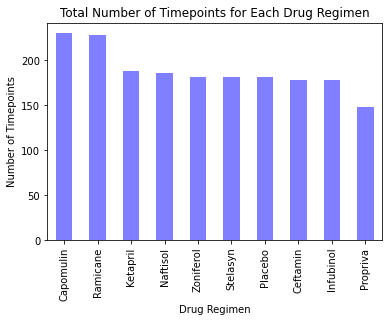

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = cleaned_data["Drug Regimen"].value_counts()

timepoints.plot(kind="bar", color="b", alpha=0.5, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Total Number of Timepoints for Each Drug Regimen")

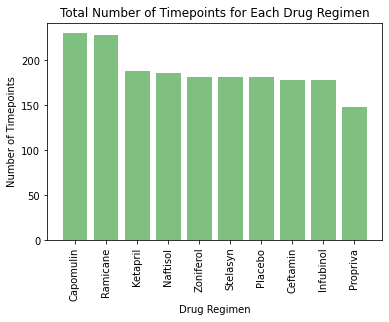

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure()
plt.bar(timepoints.index, timepoints.values, color="g", alpha=0.5, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Total Number of Timepoints for Each Drug Regimen")
plt.xticks(rotation=90)

plt.show()


Text(0.5, 1.0, 'Distribution of Female vs. Male Mice')

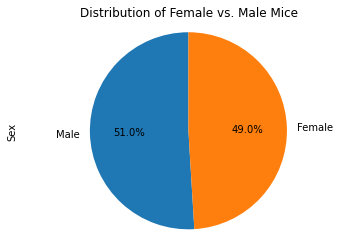

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = cleaned_data["Sex"].value_counts()

gender_counts.plot(kind="pie", y="Sex", autopct='%1.1f%%', startangle=90)
plt.axis("equal")
plt.title("Distribution of Female vs. Male Mice")


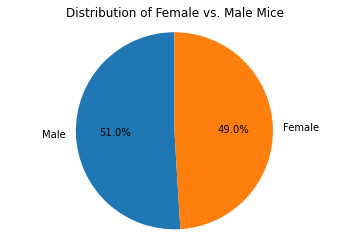

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.figure()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis("equal")
plt.title("Distribution of Female vs. Male Mice")

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(max_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'])





In [14]:
# Create empty list to fill with tumor vol data (for plotting)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data = []


# Put treatments into a list for for loop (and later for plot labels)
for treatment in treatment_list:
    tumor_vol = merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_vol)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes   
    # add subset  
    # Determine outliers using upper and lower bounds
    
for i in range(len(treatment_list)):
    quartiles = tumor_vol_data[i].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol_data[i][(tumor_vol_data[i] < lower_bound) | (tumor_vol_data[i] > upper_bound)]
    print(f"{treatment_list[i]} potential outliers: {outliers}")

    
    

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


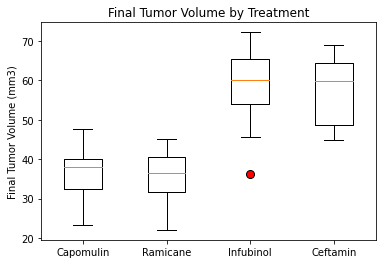

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Treatment')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(treatment_list)
ax1.boxplot(tumor_vol_data, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
plt.show()


## Line and Scatter Plots

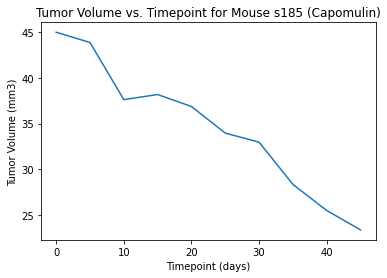

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Filter the cleaned DataFrame for mice treated with Capomulin
capomulin_df = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

# Choose a mouse ID
mouse_id = "s185"

# Filter the Capomulin DataFrame for the chosen mouse ID
mouse_df = capomulin_df[capomulin_df["Mouse ID"] == mouse_id]

# Generate a line plot of tumor volume versus time point for the chosen mouse
plt.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"])
plt.title(f"Tumor Volume vs. Timepoint for Mouse {mouse_id} (Capomulin)")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


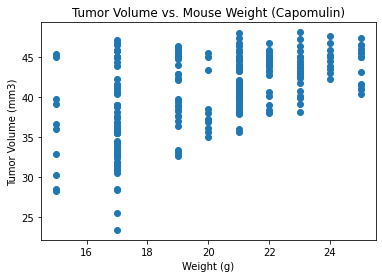

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Create a DataFrame for the Capomulin treatment regimen
capomulin_df = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

# Generate a scatter plot of tumor volume versus mouse weight for the Capomulin treatment regimen
plt.scatter(capomulin_df["Weight (g)"], capomulin_df["Tumor Volume (mm3)"])
plt.title("Tumor Volume vs. Mouse Weight (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


# Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress

capomulin_df = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin"]
avg_tumor_vol = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
correlation = st.pearsonr(avg_tumor_vol, mouse_weight)
slope, intercept, rvalue, pvalue, stderr = linregress(mouse_weight, avg_tumor_vol)
regress_values = mouse_weight * slope + intercept


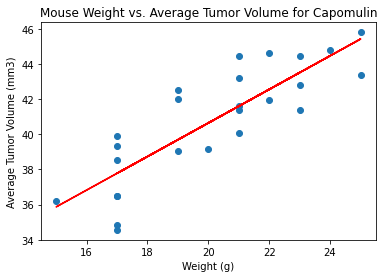

In [19]:
plt.scatter(mouse_weight, avg_tumor_vol)
plt.plot(mouse_weight, regress_values, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin')
plt.show()